# Analytical Homework 1: Supervised Learning 1: Lab Questions
### 35 points total
### Version 1.0 (September 10, 2020)



PARTNER1NAME (PARTNER1JHED), PARTER2NAME (PARTNER2JHED)

**Instructions:**
This notebook is intended to guide you through creating and exploring your dataset. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

## Part 1: Defining the Problem and Choosing a Dataset
Things to do in this part:
1. Answer questions 1-4
2. Identify data sources to use in your dataset
3. List data sources used in question 5

Your first task is to choose a problem you're interested in. You are free to choose from any domain, but it should be within the **supervised learning** paradigm. In other words, a supervised classifier should be able to generalize from a training sample of $(X,y)$ pairs to predict outcomes on unseen data $x$. We want to use machine learning, so your problem should be difficult to solve using traditional programming algorithms. 

For simplicity, you will construct data for a binary or multiclass classification problem, where the possible labels are given by a fixed set of choices, or for a regression task (real-valued labels). Do not build a dataset for a structured prediction task.


#### 1) In one or two sentences, what are you interested in predicting given what data? This is your supervised learning problem.

You should answer this question before creating your dataset, as it will provide an indication of what to search for.

<font color='blue'>
    Detect the pattern of previous filghts data to predict if future flights will have a departure delay or not.
</font>

#### 2) Is this a well-defined problem? Why or why not? What ambiguities (if any) exist in your problem?

Think about what challenges you solved by formulating the problem in this way.

<font color='blue'>
    Yes. The data source (previous filghts data) are identified. Also, the output (Binary classificaiton: whether or not the flight will have a departure delay) is determined.
</font>

#### 3) Does an easy (non-ML) solution exist for the problem? What are existing ways this problem, or a similar problem, is addressed (regardless of difficulty)?

<font color='blue'>
    No, this problem need experience (previous data) to gain experience (whether or not delay). Machine Learning Algorithms are used to predict flight arrival delays. http://cs229.stanford.edu/proj2017/final-reports/5243248.pdf 
</font>

#### 4) Why is using machine learning for this problem justified?

<font color='blue'>
    Using machine learning, we can detect the pattern in previous data to better predict the future. Also, as we learning more about previous data, the performance of the prediction will improve.
</font>

Now, we'll turn to data we can use to actually solve your problem. You may wish to use Section 3.1 of the assignment sheet for inspiration. **Remember, you are expected to *create* a dataset, not use an existing one**.

#### 5) List the sources for all data you used when creating your dataset along with (very briefly) what you obtained from it.

For example: <br /> Obtained features a,b,c from http://www.domain1.com/example_data. <br /> Obtained labels from http://www.domain2.com/example_labels.

<font color='blue'>
    Obtained data source from https://github.com/hadley/nycflights13
</font>

## Part 2: What does the data look like?
Things to do in this part:
1. Answer questions 6-11
2. Print a few examples of raw data (if possible) otherwise explain what the raw data looks like.
3. Create at least 3 numerical features from your raw data
4. Create dataset such that $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ are both numpy arrays
5. Create 1 visual that helps you understand your data.

Let's take a look at the various data you've collected. First let's read in the raw data. You may read the data into whatever is most convenient (e.g. a list, a numpy array, a Pandas dataframe, etc.). **At this point your data will be in whatever format you downloaded them in**. For example, if you're working with text data, your data might be strings of words or collection of text documents. If you are working with image data, you might have a collection of images.
<br /><br />
For those of you new to working with data in Python, we have included examples of how to import the raw data. These are merely suggestions if they work for you. You don't have to use them.

In [ ]:
# # Suppose you have a directory called documents that contains Wikipedia articles, you can process these as follows:
# # Cleaning the data (e.g. removing stop words) is not required.
# import os
# from collections import defaultdict

# files = [f for f in os.listdir('documents') if os.path.isfile(os.path.join('documents', f))
# X = defaultdict(list)
# for i, file in enumerate(files[:len(files)], start=1):
#     with open(os.path.join('documents', file)) as f:
#         X['doc_' + str(i)] = f.readlines()
# # X is a dictinary that maps doc_id to text.

# # Suppose you have labels that are stored in a CSV file:
# import pandas as pd

# y = pd.read_csv('labels.csv')
# # y is a Pandas dataframe that contains each label.

# # Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
# from PIL import Image

# images = [f for f in os.listdir('images') if os.path.isfile(os.path.join('images', f))
# X = [Image.open(image) for image in images]
# # X is a list of PIL Image objects




In [ ]:
import os
cwd = os.getcwd()
cwd
from google.colab import files
uploaded = files.upload()

Saving simple.csv to simple (7).csv


In [ ]:
import pandas as pd
import io

io.StringIO(uploaded["simple.csv"].decode("utf-8"))

df = pd.read_csv(io.StringIO(uploaded["simple.csv"].decode("utf-8")))[1:]


In [ ]:
#######################################################
# TODO: Read in your raw data
X = df.drop(columns='delay')
y = df.iloc[:, 4].values 
#######################################################

Now, let's print a few examples. Depending on your data format, you may have to write this yourself. We have provided some examples below.

In [ ]:
# # If your data is stored in an array:
# print('X:', X[:5])
# print('y:', y[:5])

# # If your data consists of image files:
# from PIL import Image

# for i in range(5):
#     print('image:')
#     img = X[i]
#     img.show()
#     print('label:', y[i])

#######################################################
# TODO: print out what a few examples of your raw data.
print('X:', X[:5])
print('y:', y[:5])
#######################################################

X:     temp  humid  wind_dir  wind_speed
0  62.96  77.83       210    13.80936
1  59.00  64.22       240     9.20624
2  33.98  49.51       270    17.26170
3  37.04  45.58        20     5.75390
4  62.96  44.47       160    13.80936
y: [0 1 1 0 0]


#### (Optional) If your raw data format can't be displayed in a Jupyter notebook (e.g. video or audio files), you may skip the above step. You should still look at the raw data in whatever way possibly, but instead just describe what the raw data is that you look at.

<font color='blue'>
    There are 100 data entries in the raw data. Each raw represent the information of a flight. Temr, humid, wind_dir,	wind_speed are four features and delay is the prediction.
</font>

#### 6) What information is contained in each example (row) in $X$? These are your raw data features.

<font color='blue'>
    All features are numerical values. 
    'temp' is the temprature when flight departured (Fahrenheit).
    'humid' is the humidity (%).
    'wind_dir' is the wind direction (degree).
    'wind_speed' is the wind speed (m/s).
</font>

If your data is not numerical, this will be difficult for an algorithm to learn directly. So, now that you've seen what the raw data looks like, you will start extracting *numerical* features from the raw data.
<br /><br />
We obtain features through a process called **feature engineering**. Features may be derived from the existing raw data or may come from other data sources that can be associated with each example. This is a challenging task that often requires domain knowledge about the problem you are trying to solve. 
<br /><br />
While very important in dataset creation, feature engineering is not the focus of this assignment. You will need some features for the other steps, but these can be very simple and don't need to rely on domain knowledge.
<br /><br />
**You will need to add at least 3 features to your dataset**. If your data is Wikipedia documents, possible features could be number of sentences, word count, the words that appear in the article, number of document revisions, number of contributing authors, number of references, etc. Notice that some of these features could be derived from the raw data (i.e. the words) while others may need to be downloaded separately (i.e. page metadata). If your data are cat images, your features could be focus measure (i.e. blurriness/sharpness) using OpenCV Variance of Laplacian, whether image is grayscale, number of pixels, the pixel color values, etc.
<br /><br />
You are free to obtain features in any way you like as long as you can justify why the features your propose should help solve the problem you've defined.
<br /><br />
We'll provide some examples of what we're looking for. We are not expecting anything fancy for this step.

In [ ]:
uploaded = files.upload()

Saving more.csv to more.csv


In [ ]:
# # If you're using text data stored in a dictionary (like example above):
# # Suppose each document is a string that contains a period
# # and are trying to predict end of sentences (EOS),
# import re
# import pandas as pd
# from collections import defaultdict

# # Convert X from doc_id -> text to doc_id -> {sentence, features}
# X = {k:{'sentence': v, 'features': None} for k,v in X.items()}

# # suppose you downloaded these external data: common abbreviations, titles (e.g. mr, ms, dr), month abbreviations (e.g. sept, oct)
# abbrevs = pd.read_csv('common_abbrevs.csv')
# titles = pd.read_csv('titles.csv')
# months = pd.read_csv('month_abbrevs.csv')

# # for the purpose of this example, assume all documents have len > 3
# features = defaultdict(int)
# for doc_id, doc in X.items():
#     idx = re.find('.')
#     one_before = doc['sentence'][idx - 1] if idx > 0 else None
#     one_after = doc['sentence'][idx + 1] if idx < len(doc['sentence']) - 1 else None
#     features['is_abbrev'] = 1 if one_before and one_before in abbrevs else 0
#     features['is_title'] = 1 if one_before and one_before in titles else 0
#     features['is_month'] = 1 if one_before and one_before in months else 0
#     features['is_decimal'] = 1 if one_before and one_after in one_before.isdigit() and one_after.isdigit() else 0
#     features['other_punc'] = 1 if any((p in '?!.') for c in doc['sentence'][idx:]) else 0
#     features['period_loc'] = idx
#     X[doc_id]['features'] = features
# # In just a few lines of Python, we created 6 features!

#######################################################
# TODO: compute features for each example
io.StringIO(uploaded["more.csv"].decode("utf-8"))

df_wide = pd.read_csv(io.StringIO(uploaded["more.csv"].decode("utf-8")))
#######################################################

,temp,humid,wind_dir,wind_speed,sched_dep_time,air_time,distance
0,62.96,77.83,210,13.80936,600,123,762
1,59.00,64.22,240,9.20624,1250,44,187
2,33.98,49.51,270,17.26170,1715,133,950
3,37.04,45.58,20,5.75390,2030,107,711
4,62.96,44.47,160,13.80936,1625,90,502
...,...,...,...,...,...,...,...
95,26.96,50.34,330,18.41248,2000,140,1005
96,66.02,52.22,40,10.35702,1530,343,2586
97,75.92,43.21,0,0.00000,1215,194,1389
98,32.00,58.37,280,14.96014,600,110,711


#### 7) Describe the features in your dataset.

<font color='blue'>
    Besides the previous four features (
      'temp', 'humid','wind_dir', 'wind_speed'
      ), 
    there are 3 numberical features added: 
    sched_dep_time: schedualed departure time of the flight (hhmm);	
    air_time: travel time (min);
    distance: travel distance (km).
    These three new features are general information about flights. They are unlikely highly correlated to the other four features (weather information), but they are also useful information about the flight. We could improve our ML performance by gaining more information.




</font>

Next, let's focus on what you're trying to predict. First, let's see what the potential outcomes look like.

In [ ]:
import numpy as np

np.unique(y)

array([0, 1])

#### 8) Is your dataset suitable for a regression or classification task? Explain.

<font color='blue'>
    This dataset is suitable for classification task, because the prediction is a categorical variable.
</font>

Now, we'll standardize our data as follows. The data matrix $X$ should be a numpy 2d array in $\mathbb{R}^{m\times n}$. The labels should be a numpy 1d array in $\mathbb{R}^m$. $m$ is the number of examples and $n$ is the number of features. **You will be training your supervised classifer on the features, which may not include all (or any) of the raw data**. This is a decision you will make when creating your dataset.
<br /><br />
Note: this is the format we're looking for your data to be in when you submit your dataset (i.e. $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ and are both numpy arrays).

In [ ]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
X = df_wide.drop(columns='delay')
y = y
#######################################################

If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [ ]:
for i in np.unique(y):
    print(f'{len(y[y==i])} examples of class {i}')

61 examples of class 0
39 examples of class 1


#### 9) Classification: Is your dataset balanced or imbalanced?


Regression: How are your labels distributed? Normal distrbution? Uniform within a range? etc.

<font color='blue'>
    As a binary categorical data, the prediction is balanced (3:2).
</font>

Let's compute some statistics for the dataset.

In [ ]:
#######################################################
print(f'Number of examples: {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# TODO: if applicable, please include any additional dataset statistics here
#######################################################

Number of examples: 100
Number of features per example: 4


#### 10) Do you have lot's of high quality data? Explain any limitations (if any) that exist in terms of data quantity and quality.

<font color='blue'>
    Quantity: there are only 100 data entries. More examples would help prediction.
    Quality: some features have more than 10% missing value, so than they are removed from the data frame. This features could be useful information for predicting the delay.
</font>

Data visualizations help us understand our data and draw insights. Just like there is no single ML algorithm that applies to every problem, there isn't a visualization that works for every dataset.
<br /> <br />
Instead, you will produce some visuals that you think tell an interesting story about your data. We will provide some suggestions, which you can use for inspiration. 
<br /> <br />

Types of information you may wish to capture (this is by no means comprehensive):
*   Missingness of data (consider using heat maps, scatter plots)
*   Correlation of features (consider using a correlation matrix)
*   Distribution of data (consider using historgrams, violin plots)
*   Linear separability, if you have binary classification
<br /> <br />

Check out these visualization galleries for further inspiration and example code:
*   [Seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Python Graph Gallery](https://python-graph-gallery.com/)

You should create **at least 1 visualization** for your dataset and explain what you learned about your data from it. Below is an example heatmap showing correlation of features from the sklearn iris dataset.

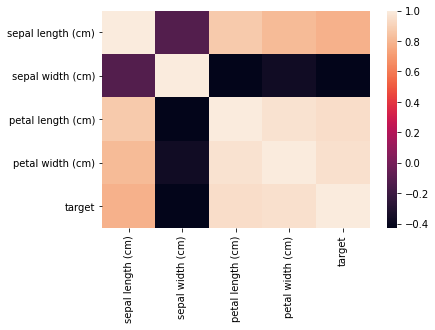

In [ ]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()

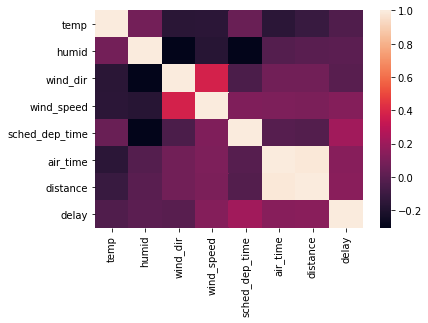

In [ ]:
#######################################################
# TODO: Visualize the dataset
list(X.columns)
df = pd.DataFrame(data= np.c_[X, y],
                     columns= list(X.columns) + ['delay'])
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()
#######################################################

#### 11) What insights do you gain from this visualization about your dataset?

<font color='blue'>
    The correlation between features are pretty low, excepting for two distance and air_time. That makes sence because travel distance should be porportional to travel time. Therefore, we should remove one of them from features.
</font>

## Part 3: Using your dataset

Things to do in this part:
1. Answer questions 12-13
2. Perform a train-test split
3. Train simple supervised learning algorithm on dataset

Now that you have created your dataset and explored some of its properties, you will use a supervised classifier to predict the outcome you definined in the problem statement. To evaluate how well this classifier predicts the outcomes, you will need to set some data aside for testing. First, you'll use sklearn to split the data into train and test sets, with 25% of the data reserved for testing.

In [ ]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples{ {X_test.shape[0]}}')

Training examples: 75
Testing examples{25}


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [ ]:
import numpy as np 

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

# zip together all components of your dataset
!zip homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

updating: X_train.csv (deflated 85%)
updating: X_test.csv (deflated 81%)
updating: y_train.csv (deflated 97%)
updating: y_test.csv (deflated 95%)


Now, let's train some classifiers. You are encouraged to try out multiple different algorithms and can use popular packages such as sklearn. We have included sklearn's Logistic Regression and Linear Regression algorithms below as examples.
<br /><br />
Consider trying the following algorithms:
<br />
Classification: SVM, Decision Tree, Random Forest
<br />
Regression: Lasso, ridge regression

In [ ]:
# # If you have a classification problem, here is how to train a Logistic Regression classifier

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'model accuracy is {accuracy}')

# # If you have a regression problem, here is how to train a Linear Regression classifier

# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train, y_train)
# y_hat = reg.predict(X_test)
# r_squared = reg.score(X_test, y_test)
# print(f'Goodness of fit given by coefficient of determination is {r_squared}')

#######################################################
# TODO: Train a simple supervised learning algorithm on your dataset

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100)
# Train the model on training data
rf.fit(X_train, y_train);

# Calculate the accuracy
accuracy = rf.score(X_test, y_test)

print(f'model accuracy is {accuracy}')
#######################################################

model accuracy is 0.52
model accuracy is 0.52


#### 12) Can you meaningfully evaluate results?  What is the loss function measuring in the context of your problem?

<font color='blue'>
    The ML model has a poor performance. It could becasue the features are not well transformed. We should do more exploratory data analysis before fitting the data into ML models. The loss function is measuring weather the ML model accuratelly predict flight delay.
</font>

#### 13) In creating your dataset, what discussions did you have about the ethical implications of what you were collecting? Are there any potential issues with fairness?

<font color='blue'>
    When collecting data, we only use data that are clean and easy to get. It could introduce bias to the data frame.
</font>

## Submit
Great work! You're all done.

Make sure to submit this Python notebook (as a PDF) and the dataset you created as a zip file. See the homework writeup for directions.